#  Data Augmentations Exploration
The purpose of the notebook is to explore the use of different data augmentations.

In [1]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(str(Path.cwd().parent))
from PIL import Image
from matplotlib import cm

import multiprocessing
import os
import cv2
import numpy as np
from loguru import logger
from src.utils.gcs_utils import set_environement_variable
from torchvision import transforms

is_env_variables_set = set_environement_variable()
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/home/gauthies/sdd/sdd-general/dist/auth.json'

from src.utils import envs 
e=envs.Envs()

import src.utils.config_manager as config_manager
config_manager.download_config_from_gcs()
config=config_manager.init_config()
from src.data.make_dataset import read_images_initial
from src.utils.utils import logger_config
from src.utils.gcs_utils import *
from src.data.GCPDataset import GCPDataset
logger.configure(**logger_config())
from src.data.skin_functions import masknonskin
load_models = e.load_models
multiprocessing.set_start_method('spawn', force=True)
bucket = get_bucket_gcs('oro-ds-test-bucket')

Using Default Env Variable:GCS
Using Default Env Variable:LOAD_MODELS
Using Default Env Variable:GCS_IMAGE_BUCKET
Using Default Env Variable:USER_DERMINATOR
Using Default Env Variable:PW_DERMINATOR
Using config file from environment variable GCS


# 1. Skin Ratio Exploration

In this section, we visualize some images with their skin ratios.

In [2]:
df = read_images_initial(config)
df = df.sort_values('ratios')

Predictions on 214 images.


In [9]:
def visualize_images_with_ratio(num_col = 6,num_row = 4, transforms= None, masking= False):
    f, axarr = plt.subplots(num_row,num_col,  figsize=(20,10) )
    idx = 0
    for i in range(num_row):
        for j in range(num_col):
            img_name = df.iloc[idx]['filename']
            image=cv2.imdecode(np.asarray(bytearray(bucket.blob(img_name).download_as_string()), dtype=np.uint8),cv2.IMREAD_COLOR)
            if masking:
                image =masknonskin(image, "either", 1)
            image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            if transforms is not None:
                image = Image.fromarray(image, 'RGB')
                image = transforms(image)
                image =  np.asarray(image)
            axarr[i,j].imshow(image)
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title(f"Ratio: {df.iloc[idx]['ratios']:.2f}")
            idx+=1
    plt.show()

Here, let's visualize some images with their corresponding ratios.

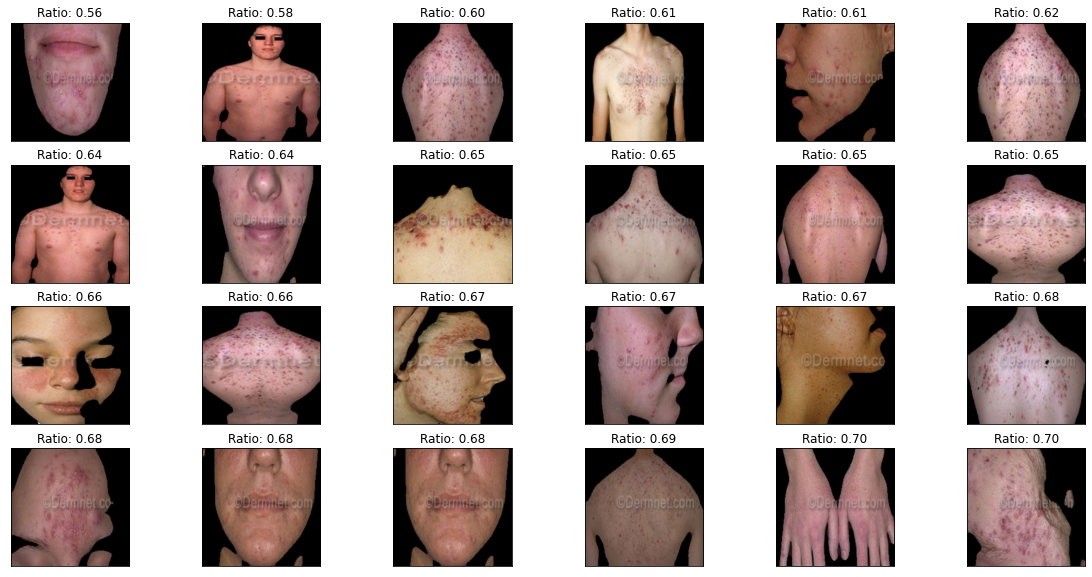

In [12]:
visualize_images_with_ratio(masking= False)


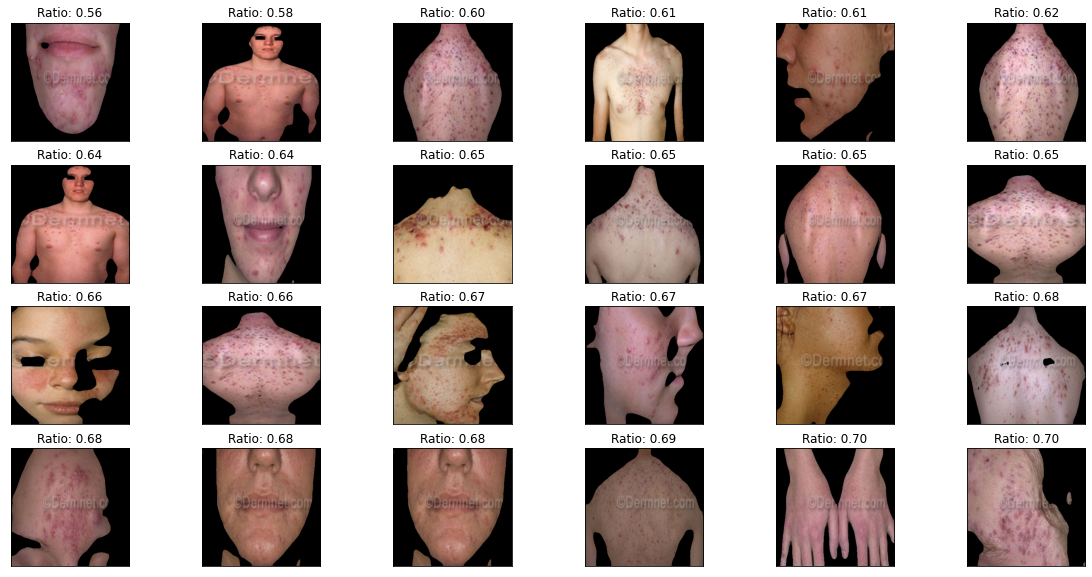

In [13]:
visualize_images_with_ratio(num_col = 6, num_row = 4, masking=True)

## 2.1 Random  & Center Crop

In [14]:
scale = 256
size=(224,224)

Random Crop

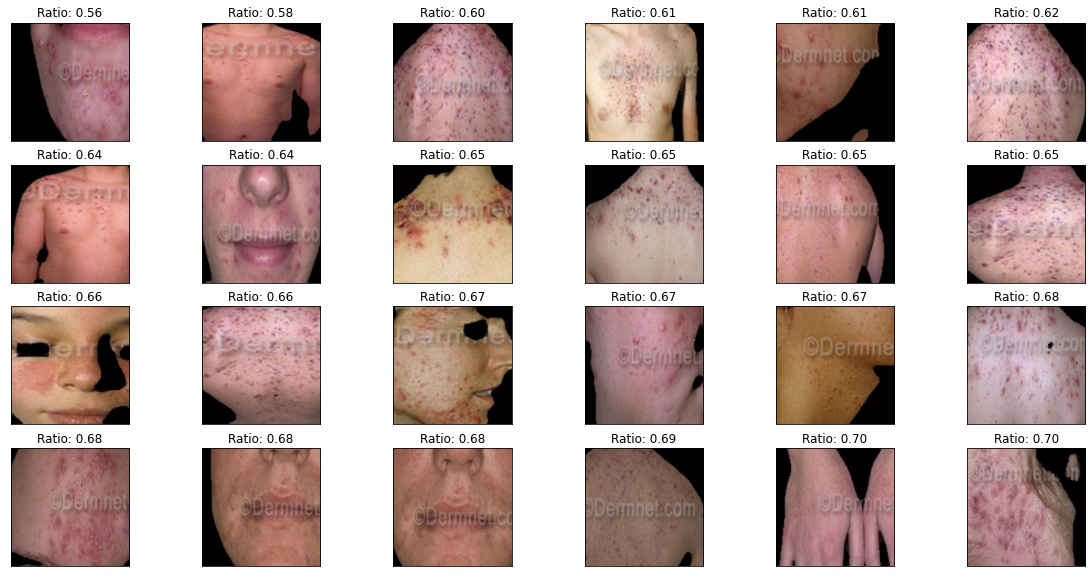

In [15]:
transform =  transforms.Compose([
        transforms.RandomCrop(size)])

visualize_images_with_ratio(num_col = 6,num_row = 4, transforms=transform, masking= False)
 

Center Crop

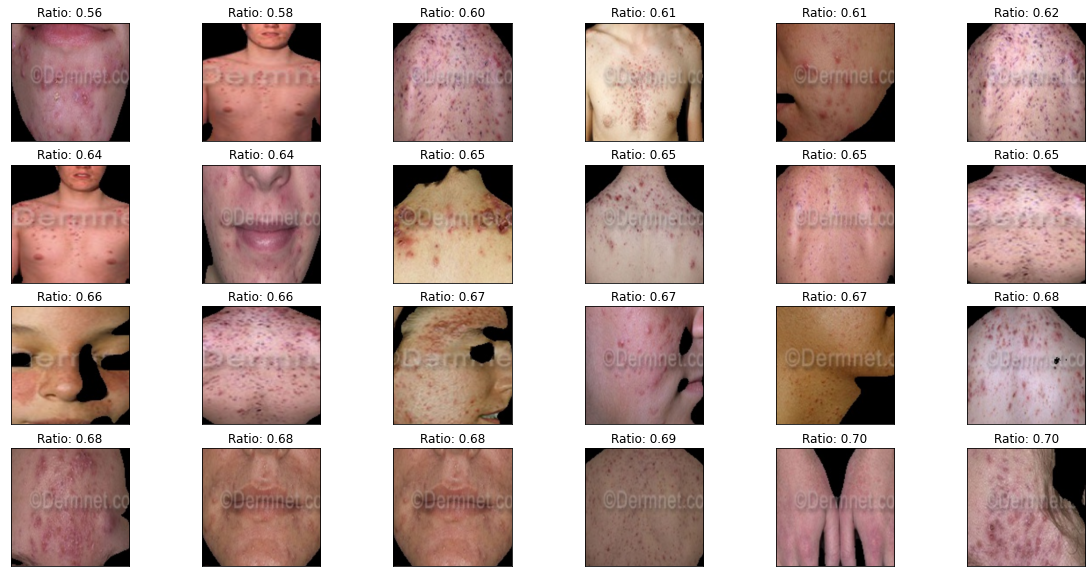

In [16]:
transform =  transforms.Compose([
        transforms.CenterCrop(size)])

visualize_images_with_ratio(num_col = 6,num_row = 4, transforms=transform, masking= False)

## 2.2 Brightness

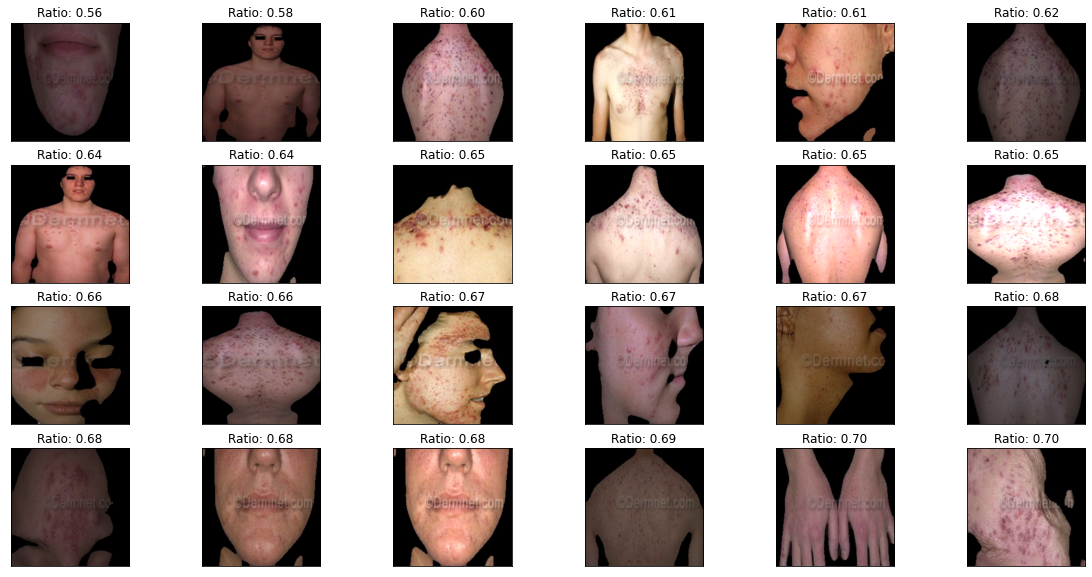

In [17]:
transform =  transforms.Compose([
        transforms.ColorJitter(brightness=0.6, contrast=0, saturation=0, hue=0)])

visualize_images_with_ratio(num_col = 6,num_row = 4, transforms=transform, masking= False)

## 2.3 Hue

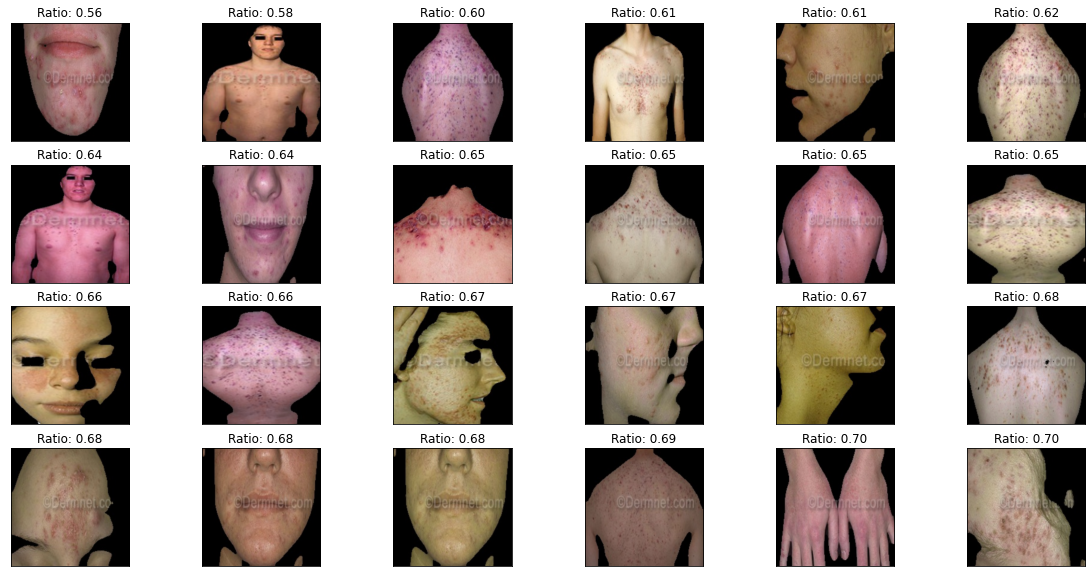

In [18]:
transform =  transforms.Compose([
        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.1)])

visualize_images_with_ratio(num_col = 6,num_row = 4, transforms=transform, masking= False)

## 2.4 Saturation Contrast

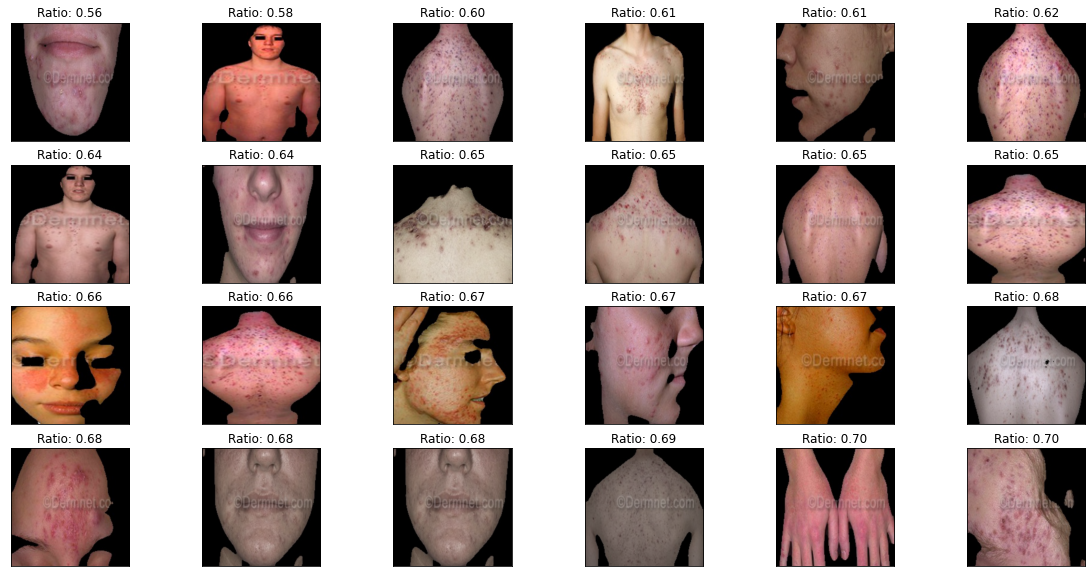

In [19]:
transform =  transforms.Compose([
        transforms.ColorJitter(brightness=0, contrast=0, saturation=0.7, hue=0)])

visualize_images_with_ratio(num_col = 6,num_row = 4, transforms=transform, masking= False)

## 2.5  Brightness & Saturation & Hue

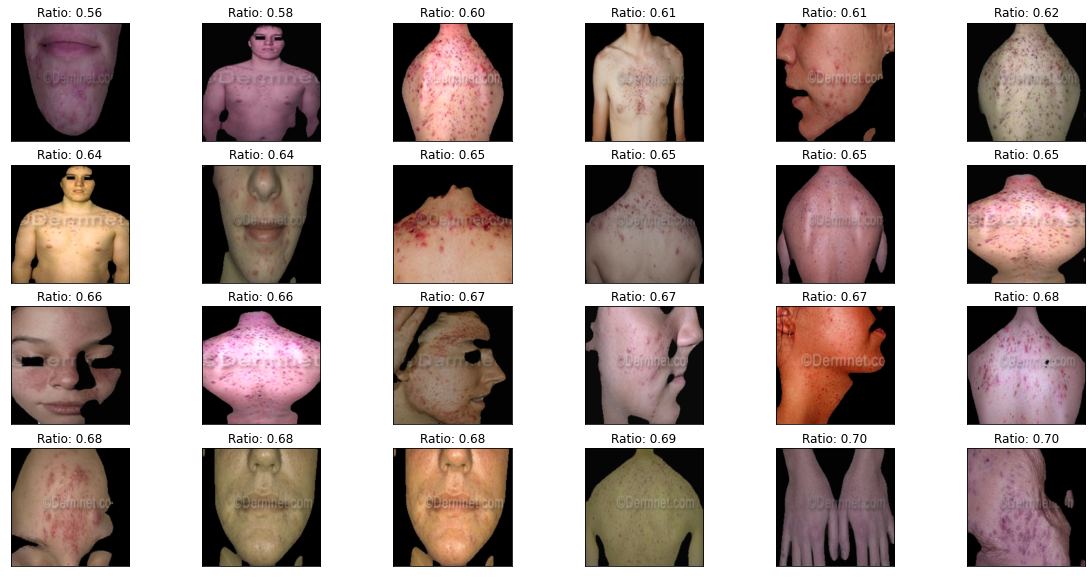

In [20]:
transform =  transforms.Compose([
        transforms.ColorJitter(brightness=0.3, contrast=0.1, saturation=0.4, hue=0.1)])

visualize_images_with_ratio(num_col = 6,num_row = 4, transforms=transform, masking= False)

## 2.6 Random Resized Crop

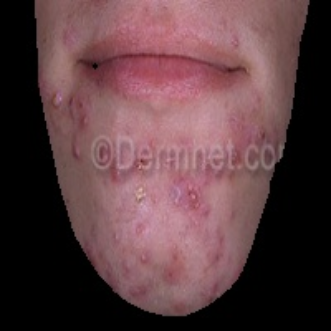

In [27]:

img_name = df.iloc[0]['filename']
image=cv2.imdecode(np.asarray(bytearray(bucket.blob(img_name).download_as_string()), dtype=np.uint8),cv2.IMREAD_COLOR)       
image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image, 'RGB')

image

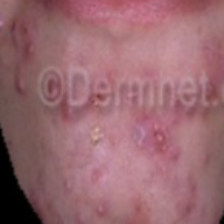

In [33]:
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(size=(224,224), scale=(0.3, 1.0), ratio=(0.75, 1.3333333333333333))])
transform(image)